## FIFA 2019 STATISTIK PEMAIN ##

## **Deskripsi**
Kumpulan data sepakbola selalu menjadi topik yang menarik untuk dianalisis, karena para penggemar Sepakbola di seluruh dunia selalu mencari pembaruan, dan informasi-informasi tentang pemain dan club kesayangannya

## **Informasi Data**

Data ini terkait dengan kumpulan data data pemain sepakbola terbaik di dunia, Data ini dapat digunakan sebagai wadah untuk
mencari informasi tentang pemain atau club kesayangan para pecinta sepakbola.

Sumber Data >>>>>  https://www.kaggle.com/dataraj/what-do-you-know-about-footballers <<<<<

## **Tujuan**

Tujuan saya membangun Dataset FIFA19 ini menggunakan salah satu dari tehnik Machine Learning dengan akurasi terbaik untuk memprediksi status pemain ataupun mencari informasi tentang pemain dan club serta merta untuk memperoleh informasi yang akurat

## PREDIKSI DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


list(dataset.columns)

Terdapat 89 kolom pada data yang dimiliki dengan tipe data sebagai berikut :

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
dataset.isnull().any()

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 89, dtype: bool

In [6]:
dataset.shape

(18207, 89)

Bentuk dari dataset yang dimiliki yaitu (18297, 89) yang artinya terdapat 18207 baris dan 89 kolom dimana masih terdapat data yang null. 

# Explorasi Data 

In [7]:
dataset.ID.unique().shape

(18207,)

## **Preferred Foot, Overall rating and Wage**
Ada dua nilai untuk variabel ini yaitu Left dan Right tetapi terdapat beberapa nilai yang hilang di kolom Preferred Foot. Berikut adalah analisis terkait apakah preferred foot mempengaruhi upah pemain atau tidak.

In [8]:
counts_preferred_foot = dataset["Preferred Foot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["Preferred Foot","Count"]
print(counts_preferred_foot)

  Preferred Foot  Count
0          Right  13948
1           Left   4211


Terdapat pemain yang menggunakan kaki kanan yaitu 13948 dan kiri 4211. Digambarkan seperti pada bar plot dibawah.

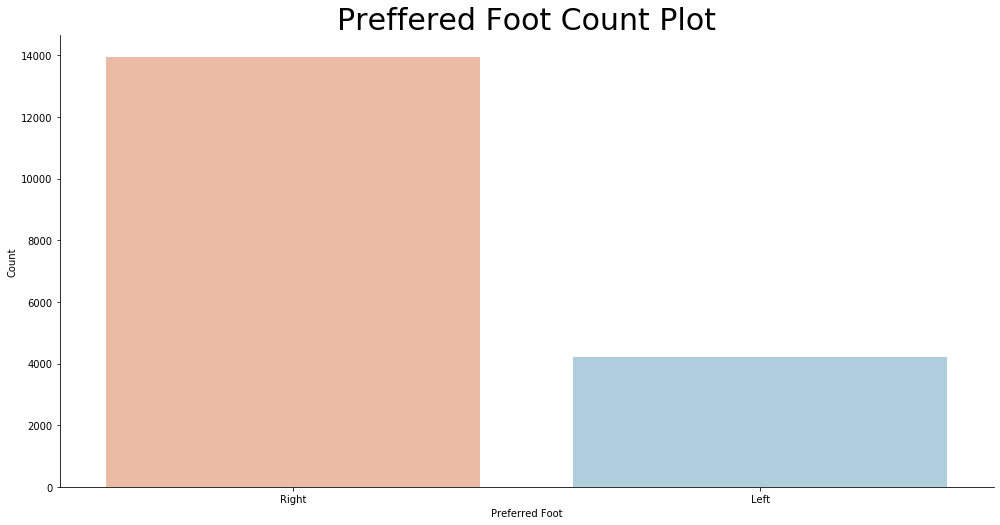

In [9]:
pt = sns.catplot(y="Count",
            x="Preferred Foot", data=counts_preferred_foot,
           palette="RdBu",height=7, aspect=2, kind="bar");
plt.title("Preffered Foot Count Plot",
          fontsize=30);

Melihat usia maximum dan minumum pemain pada data serta divisualisasikan dengan boxplot dibawah ini.

In [10]:
# USIA
dataset['Age'].unique


<bound method Series.unique of 0        31
1        33
2        26
3        27
4        27
         ..
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64>

In [11]:
dataset['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

Terlihat bahwa usia minimal pemain yaitu 16 tahun dan maximum 45 tahun. 

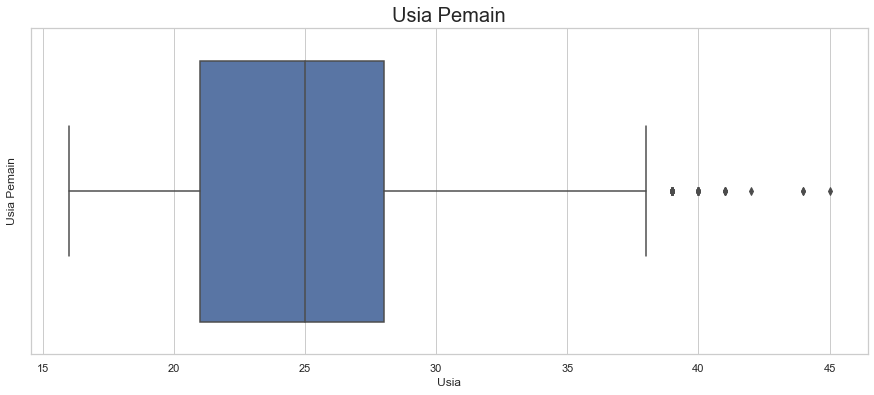

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot( x= 'Age',data=dataset)

    
plt.title( 'Usia Pemain', fontsize= '20')
plt.xlabel('Usia')
plt.ylabel('Usia Pemain')


 
plt.show()

dapat dilihat bahwa usia  pemain berapa pada usia 20 sampai kurang dari 30 tahun, dibuktikan dengan barplot dibawah ini.

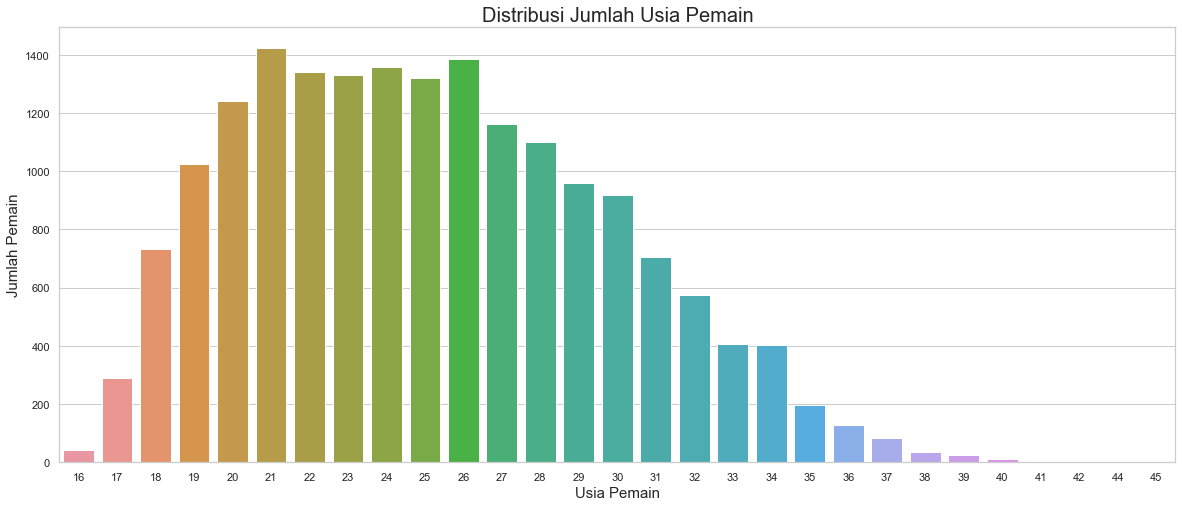

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Age', data = dataset)


plt.title('Distribusi Jumlah Usia Pemain', fontsize=20)
plt.xlabel('Usia Pemain', fontsize=15)
plt.ylabel('Jumlah Pemain', fontsize=15)

plt.show()

## **Nationality, Overall rating and Wage**

Melihat data berdasarkan kewarganegaraan , ranking dan upah.

In [15]:
counts_Nationality = dataset["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


ini menunjukan 5 Negara teratas dengan jumlah pemain terbanyak.
dan untuk lebih lengkapnya jumlah pemain berdasarkan kewarganegaraannya divisualisasikan dengan bar plot seperti dibawah ini.


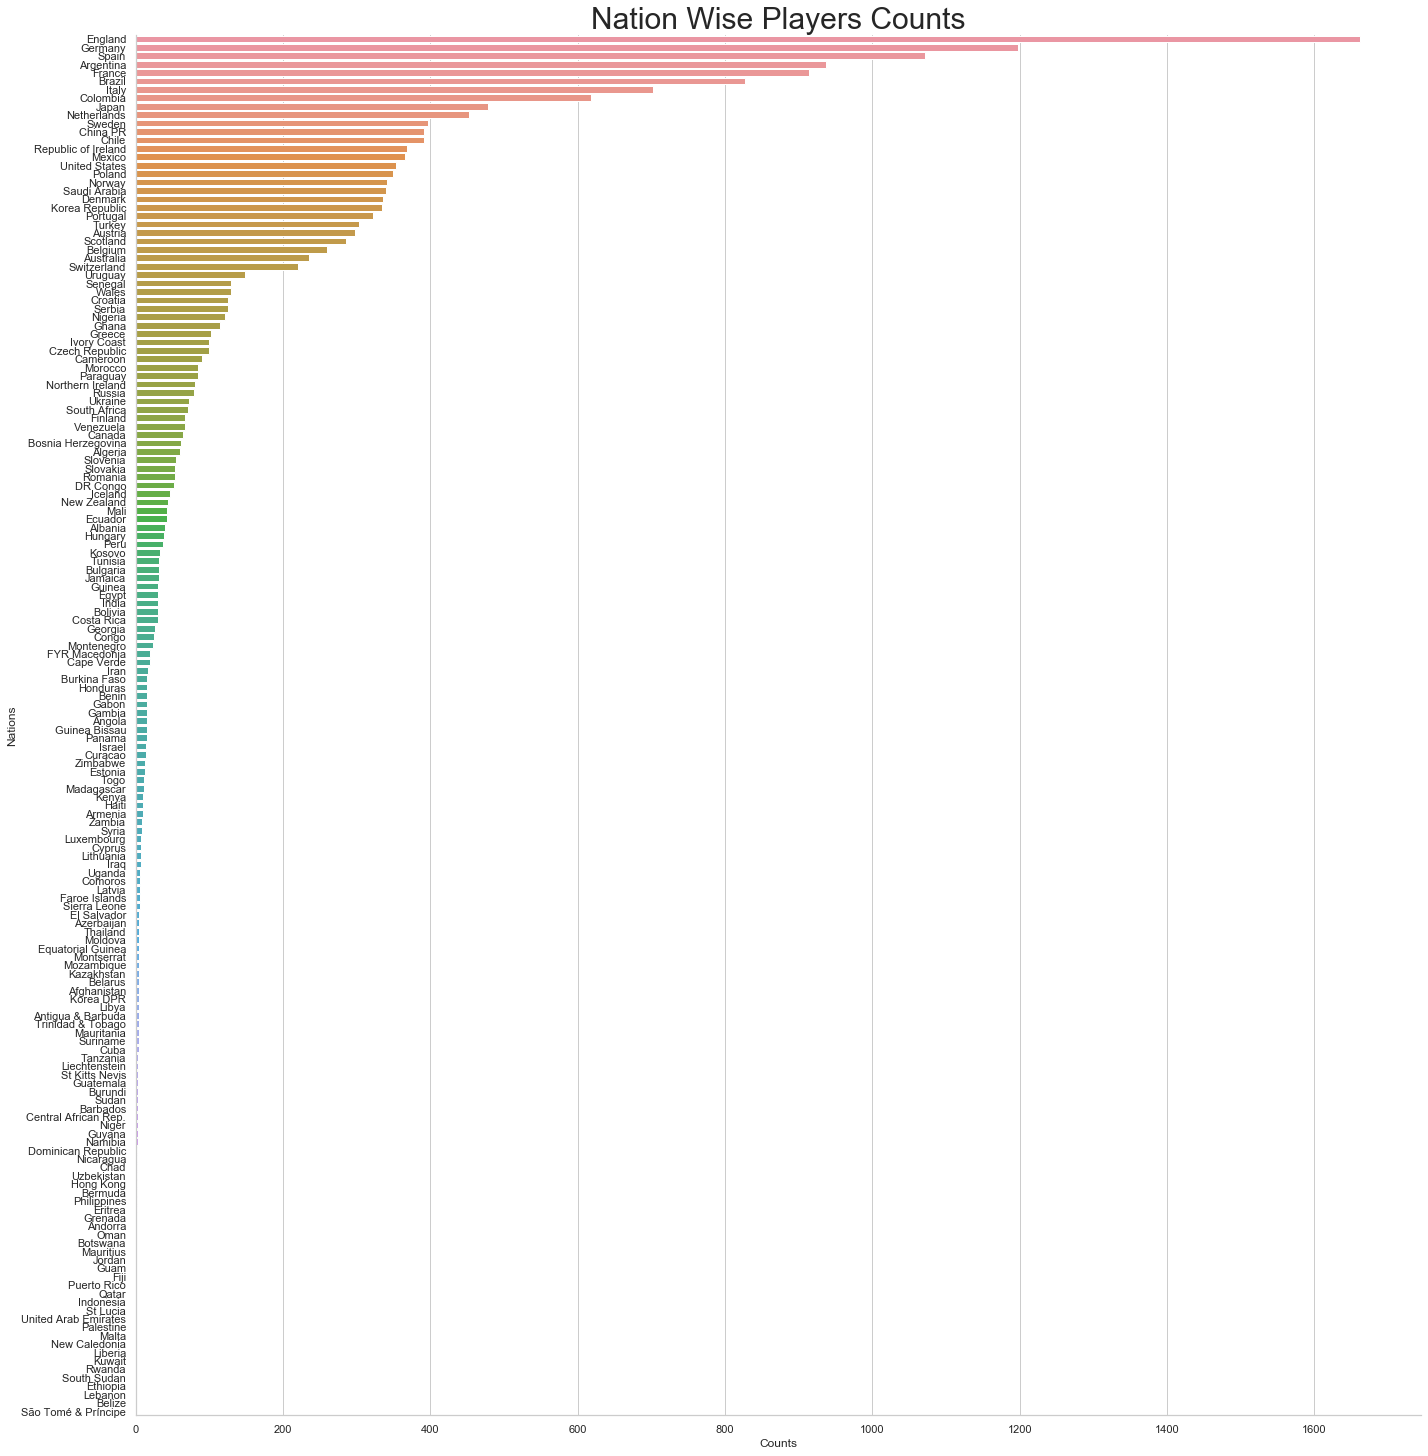

In [16]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality,
            height=20,kind="bar")
plt.title("Nation Wise Players Counts",
          fontsize=30);

In [17]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                Nations  Counts
0               England    1662
1               Germany    1198
2                 Spain    1072
3             Argentina     937
4                France     914
5                Brazil     827
6                 Italy     702
7              Colombia     618
8                 Japan     478
9           Netherlands     453
10               Sweden     397
11             China PR     392
12                Chile     391
13  Republic of Ireland     368
14               Mexico     366
15        United States     353
16               Poland     350
17               Norway     341
18         Saudi Arabia     340
19              Denmark     336


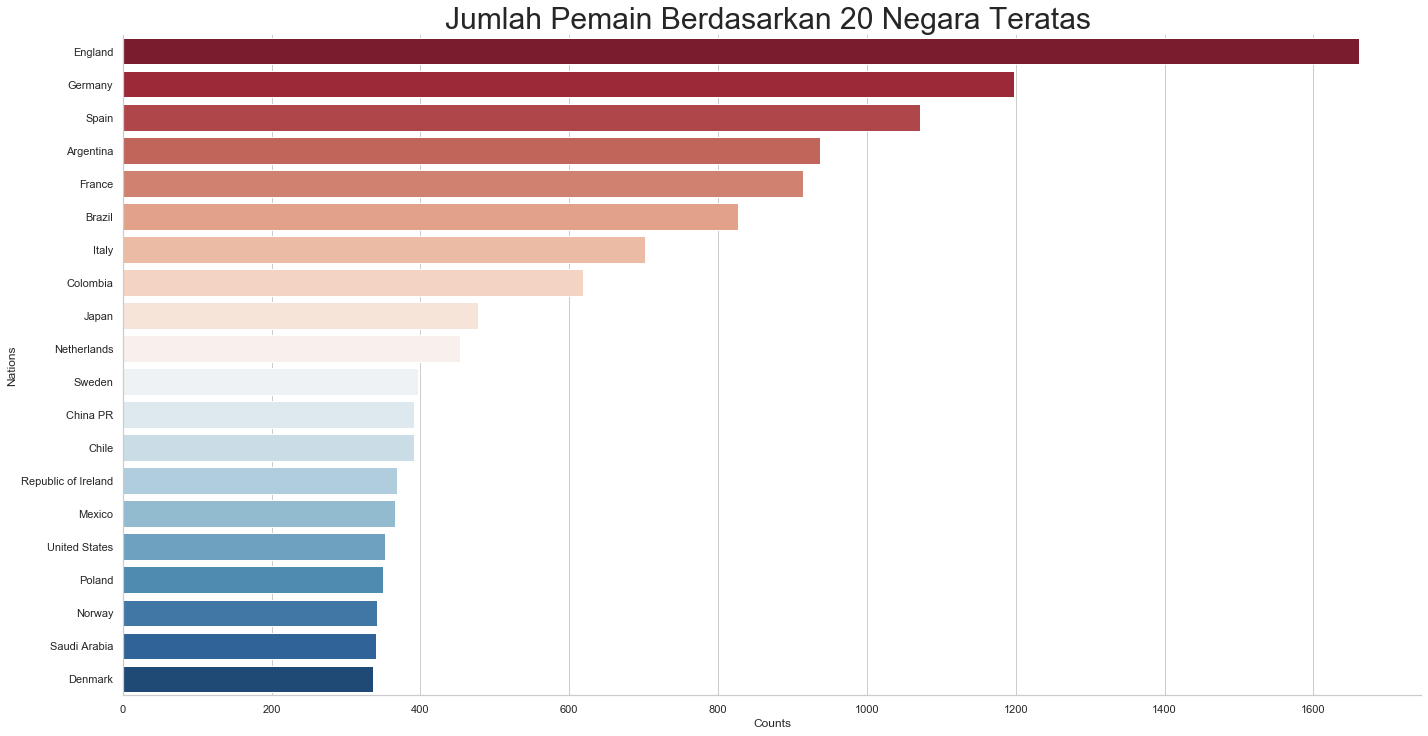

In [18]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top20,
            palette="RdBu",height=10,kind="bar",aspect=2)
plt.title("Jumlah Pemain Berdasarkan 20 Negara Teratas ",
          fontsize=30);

Plot diatas menunjukan 20 negara teratas berdasarkan jumlah pemain.

In [19]:
dataset[~dataset["Wage"].str.endswith("K")]["Wage"].head()

452    €0
538    €0
568    €0
677    €0
874    €0
Name: Wage, dtype: object

In [20]:
dataset.Wage = dataset.Wage.str.replace("€","")
dataset.Wage = dataset.Wage.str.replace("K","").astype("float")
dataset.Wage.head() 

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [21]:
avgwageoverall = dataset.groupby("Nationality", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492


In [22]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492
27,Central African Rep.,19.000000,73.333333
13,Belgium,18.480769,68.811538
2,Algeria,18.083333,70.633333
20,Brazil,17.778718,71.251511
47,Equatorial Guinea,17.200000,70.000000


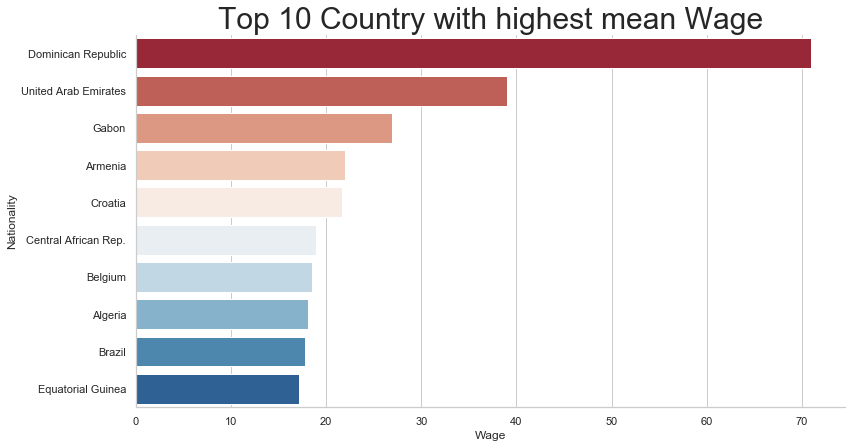

In [23]:
sns.catplot(y="Nationality",
            x="Wage",data=top10bywage,
            palette="RdBu",height=6,kind="bar",aspect=2)
plt.title("Top 10 Country with highest mean Wage",
          fontsize=30);

10 Negara teratas berdasarkan rata - rata upah pemain.

In [24]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Nationality,Wage,Overall
156,United Arab Emirates,39.000000,77.000000
27,Central African Rep.,19.000000,73.333333
77,Israel,15.857143,72.142857
42,Dominican Republic,71.000000,72.000000
147,São Tomé & Príncipe,15.000000,72.000000
116,Oman,12.000000,72.000000
26,Cape Verde,11.526316,71.631579
123,Portugal,14.310559,71.344720
150,Togo,16.000000,71.333333
20,Brazil,17.778718,71.251511


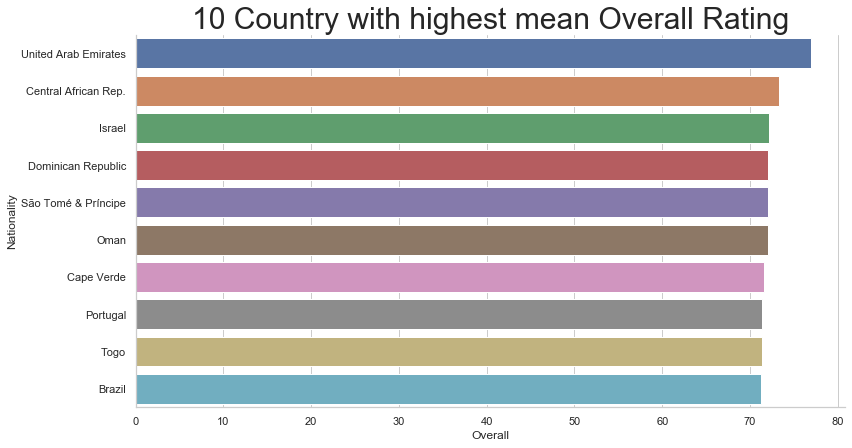

In [25]:
sns.catplot(y="Nationality",
            x="Overall",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("10 Country with highest mean Overall Rating",
          fontsize=30);

Plot diatas menunjukan 10 negara teratas dengan berdasarkan overall rating.

## Analisis Data Berdasarkan Club (Wage, dan Overall)

In [26]:
avgwageoverall = dataset.groupby("Club", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424


In [27]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424
134,Chelsea,98.454545,76.787879
363,Liverpool,87.939394,76.000000
583,Tottenham Hotspur,79.484848,76.696970
214,FC Bayern München,78.827586,77.000000
52,Arsenal,78.424242,75.181818


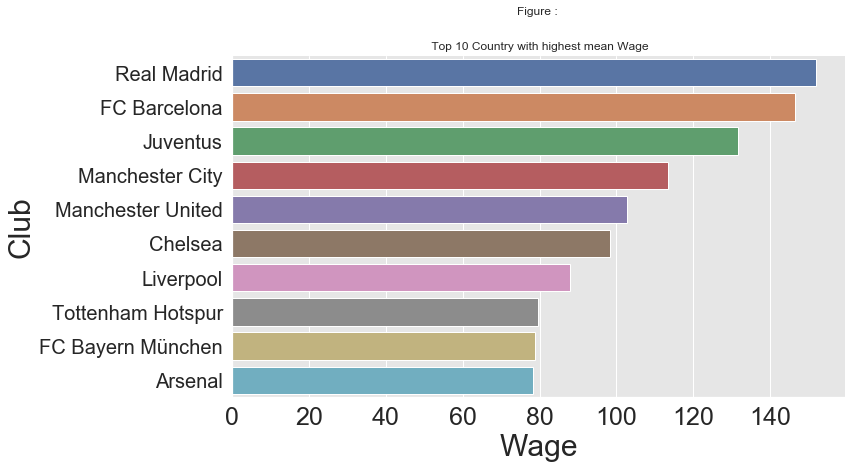

In [28]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="Club",
            x="Wage",data=top10bywage,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage");

In [29]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Club,Wage,Overall
326,Juventus,131.680000,82.280000
398,Napoli,71.080000,80.000000
315,Inter,66.500000,79.750000
470,Real Madrid,152.030303,78.242424
382,Milan,72.481481,78.074074
212,FC Barcelona,146.575758,78.030303
435,Paris Saint-Germain,72.033333,77.433333
482,Roma,53.807692,77.423077
375,Manchester United,102.757576,77.242424
214,FC Bayern München,78.827586,77.000000


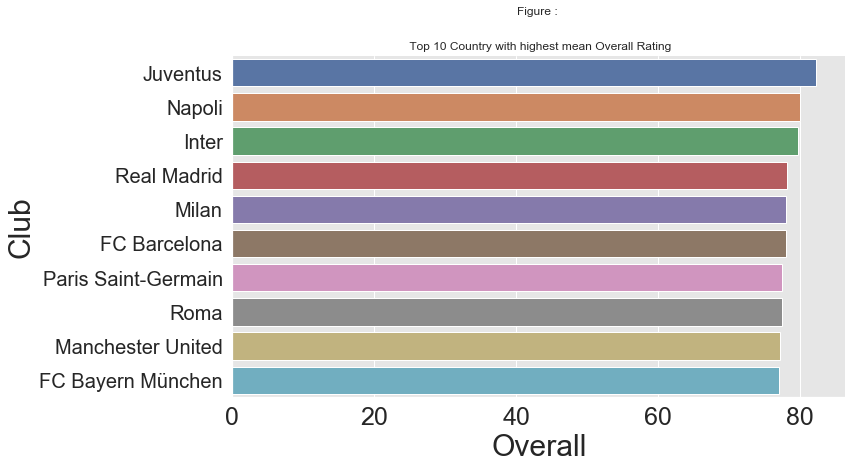

In [30]:
sns.catplot(y="Club",
            x="Overall",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");



- Terdapat 651 club.
- Kolom Club juga terdapat nilai yang hilang(missing value)
- Club efek yang sangat berbeda pada upah (wage)
- Klub tidak memiliki dampak yang sangat penting pada peringkat keseluruhan (overall rating)

## **Findings BodyType and Overall Rating and Wage.**

In [31]:
avgwageoverall = dataset.groupby("Body Type", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

,Body Type,Wage,Overall
4,Messi,565.0,94.0
1,C. Ronaldo,405.0,94.0
5,Neymar,290.0,92.0
7,PLAYER_BODY_TYPE_25,255.0,88.0
2,Courtois,240.0,89.0


In [61]:
sns.catplot(y="Body Type",
            x="Wage",data=avgwageoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage");

ValueError: Could not interpret input 'Wage'

Plot diatas ini menunjukan Body Type dari rata rata upah(wage) tertinggi.

In [33]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
avgwageoverall.head()

,Body Type,Wage,Overall
4,Messi,565.0,94.0
1,C. Ronaldo,405.0,94.0
5,Neymar,290.0,92.0
2,Courtois,240.0,89.0
7,PLAYER_BODY_TYPE_25,255.0,88.0


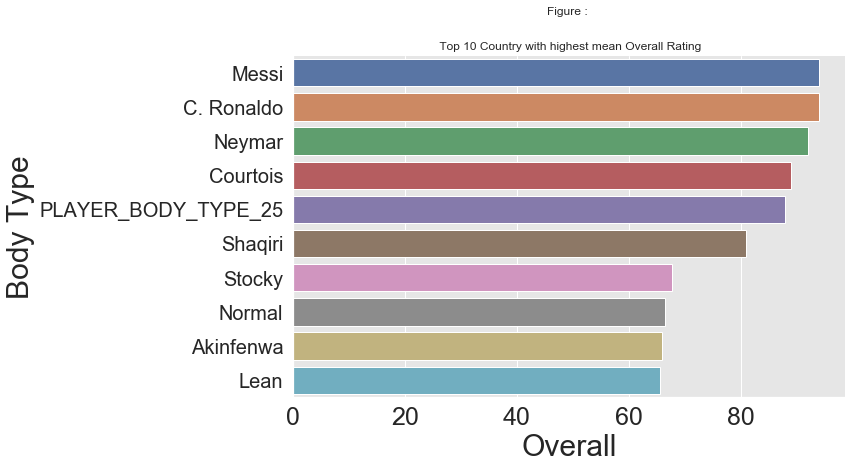

In [34]:
sns.catplot(y="Body Type",
            x="Overall",data=avgwageoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");


- 10 tipe dari body type
- kolom body type memiliki missing values
- Tipe Tubuh memengaruhi upah pemain karena tipe tubuh L. messi memiliki upah tertinggi. Upah pemain yang memiliki tipe tubuh C. Ronaldo mengikuti pemain tipe tubuh messi dalam konteks upah
- Tipe Tubuh memengaruhi peringkat keseluruhan pemain karena tipe tubuh Messi dan C. Ronaldo memiliki Peringkat Keseluruhan tertinggi. Peringkat keseluruhan pemain yang memiliki tipe Neymar mengikuti pemain tipe tubuh messi dalam konteks peringkat keseluruhan.

## **Findings Penalties and Overall Rating and Wage.**

In [35]:
dataset.Penalties.value_counts()

45.0    492
55.0    488
49.0    480
48.0    473
58.0    471
       ... 
87.0      3
7.0       1
92.0      1
91.0      1
5.0       1
Name: Penalties, Length: 87, dtype: int64

In [36]:
dataset.Penalties.head()

0    75.0
1    85.0
2    81.0
3    40.0
4    79.0
Name: Penalties, dtype: float64

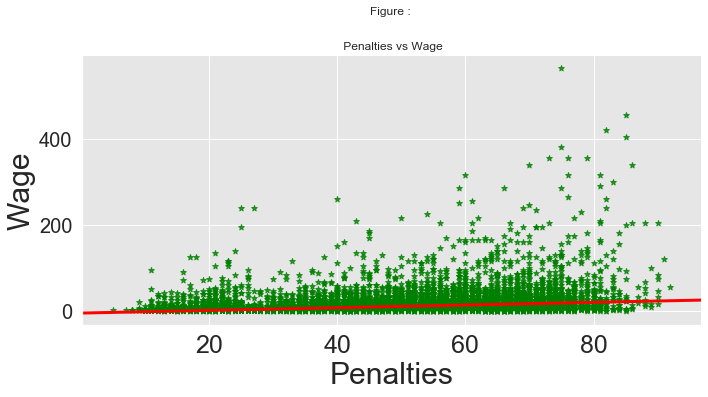

In [37]:
sns.lmplot(x="Penalties", y="Wage",data=dataset,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Penalties vs Wage");

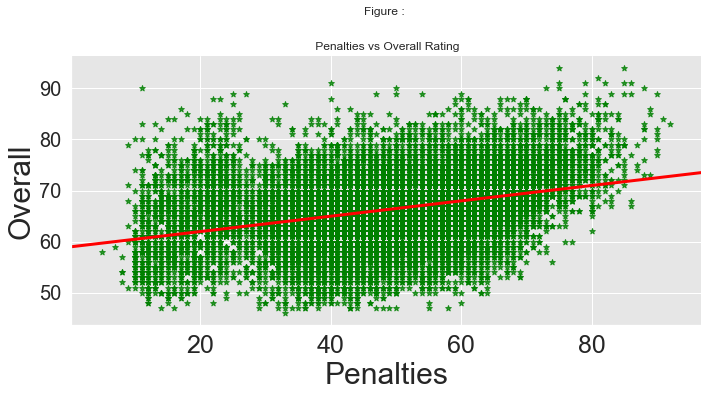

In [38]:
sns.lmplot(x="Penalties", y="Overall",data=dataset,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Penalties vs Overall Rating");

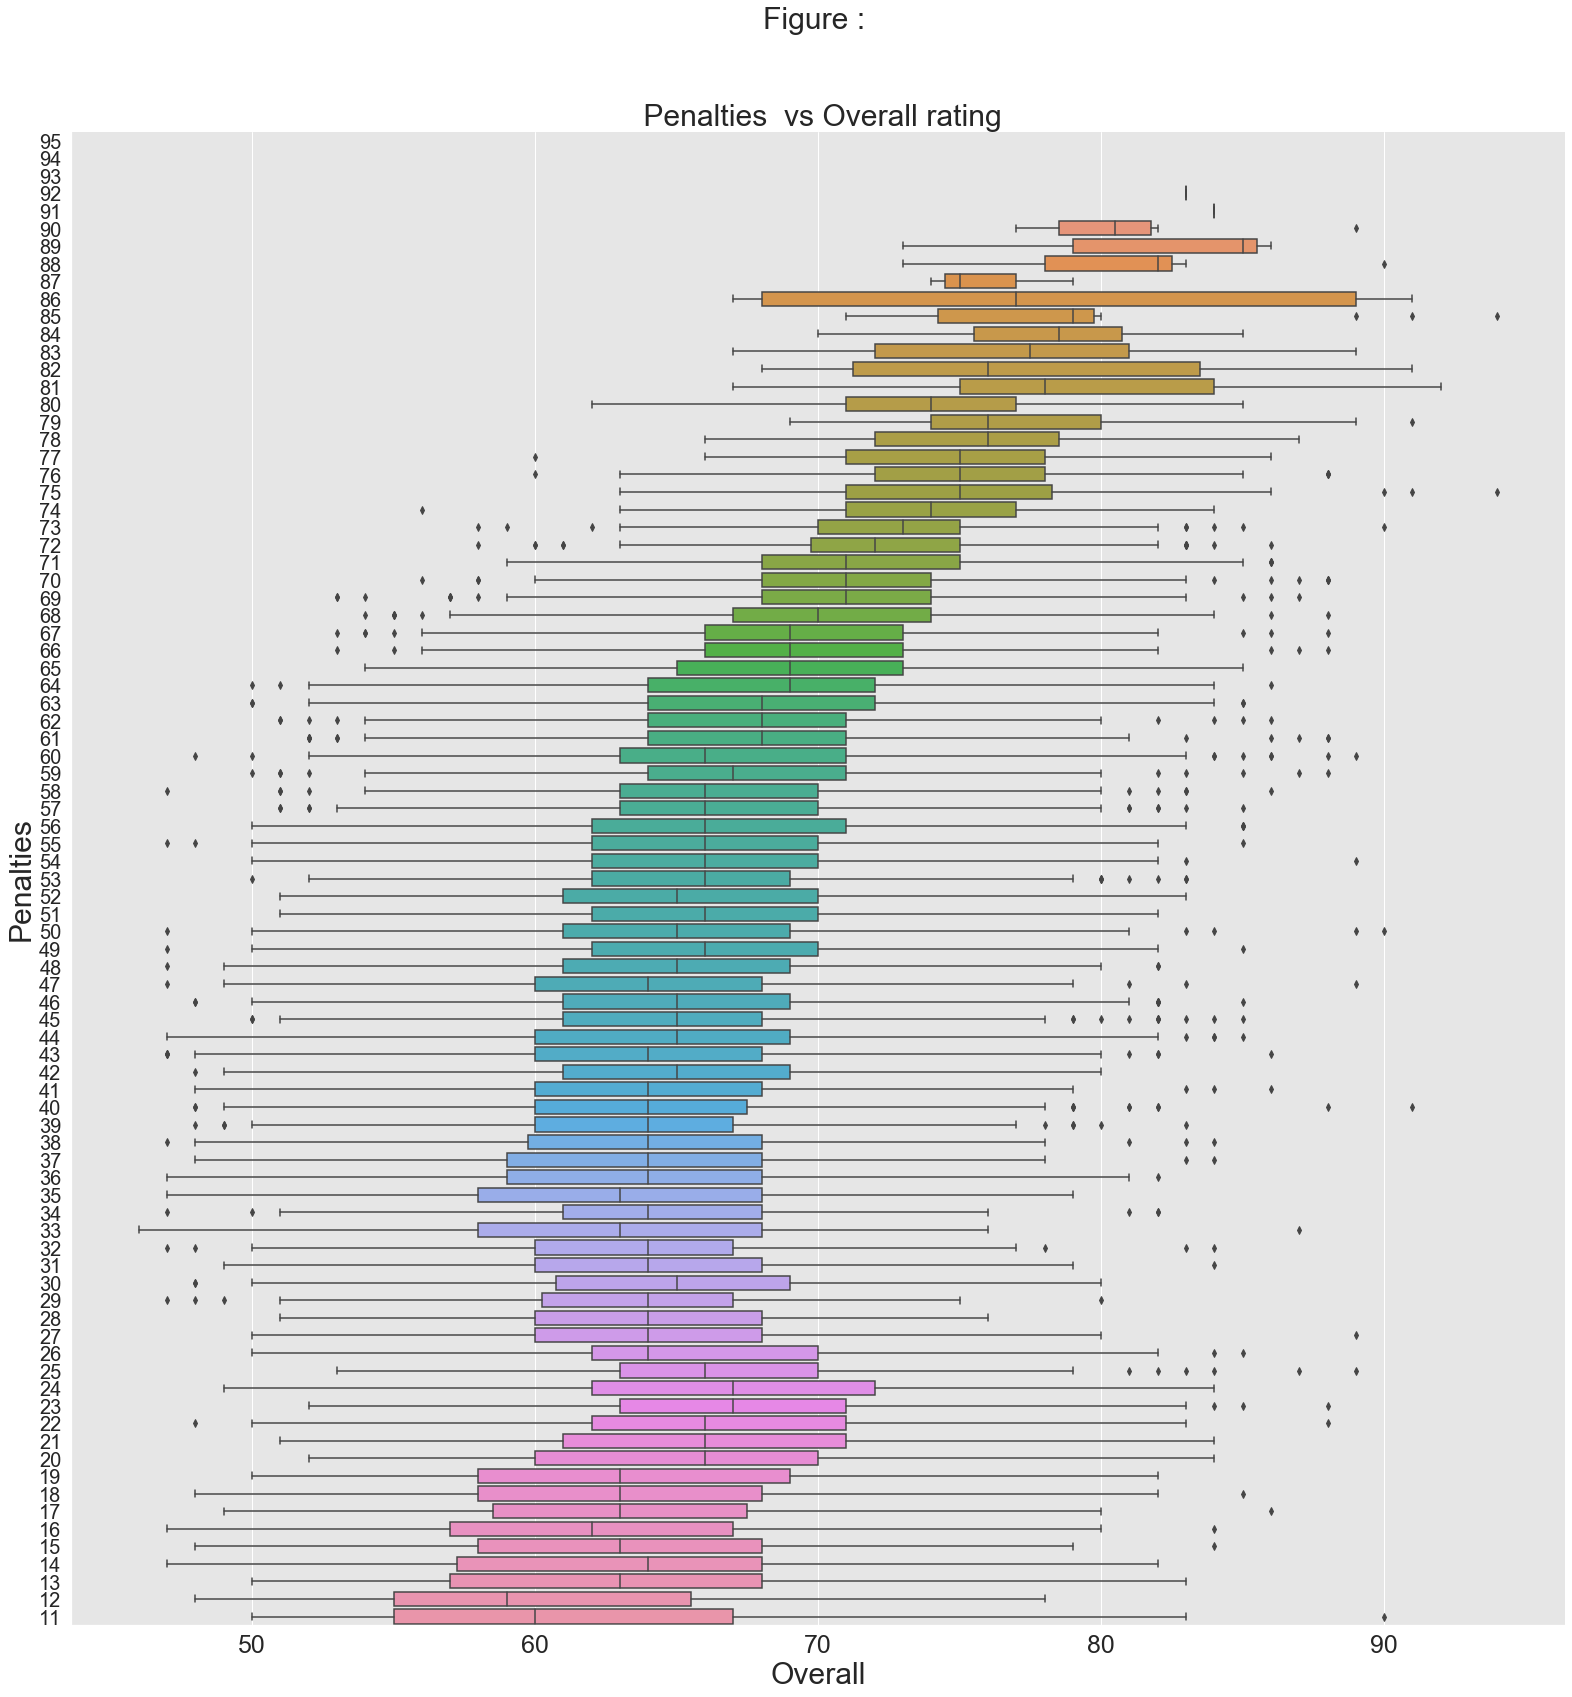

In [39]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="Penalties", x="Overall",data=dataset,
            orient="h",order=range(95,10,-1),
            kind="box",height=22);
plt.title("Figure : \n\n\n Penalties  vs Overall rating", fontsize=30);

- penalties ini diantara 11 dan 95.
- Penalti Seorang Pemain tidak banyak mempengaruhi upah mereka.
- Sebagai Penalti meningkatkan peringkat keseluruhan meningkat.

## **Findings Height and Overall Rating and Wage.**

In [40]:
dataset.Height.value_counts()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [41]:
dataset.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [42]:
dataHeight = dataset.loc[:,["Height","Wage","Overall"]].sort_values("Height")
dataHeight.head()

,Height,Wage,Overall
17157,5'1,1.0,55
6275,5'1,7.0,69
6584,5'1,5.0,69
18206,5'10,1.0,46
10257,5'10,2.0,65


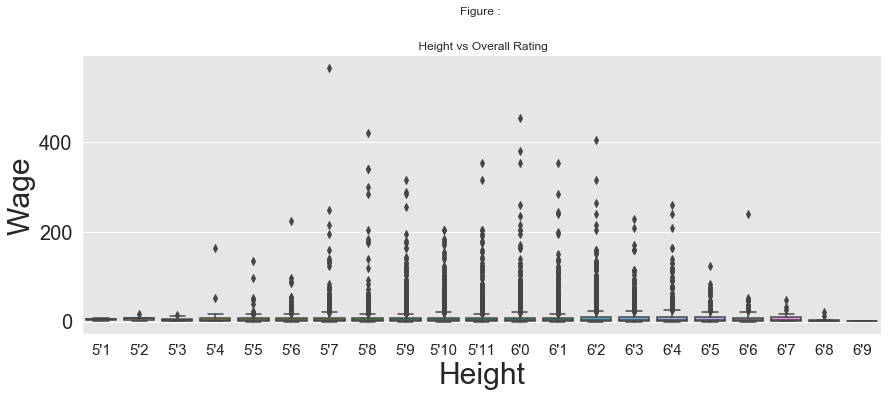

In [43]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Wage",data=dataHeight,
           order = ["5'1","5'2","5'3","5'4","5'5","5'6",
                   "5'7","5'8","5'9","5'10","5'11","6'0","6'1",
                   "6'2","6'3","6'4","6'5","6'6","6'7","6'8", "6'9"],
            kind="box",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

In [44]:
avgwageoverall = dataset.groupby("Height", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

,Height,Wage,Overall
5,5'4,12.100000,67.400000
15,6'4,11.387183,66.951936
17,6'6,11.247312,66.709677
13,6'2,10.917122,67.018859
9,5'8,10.423890,66.344609


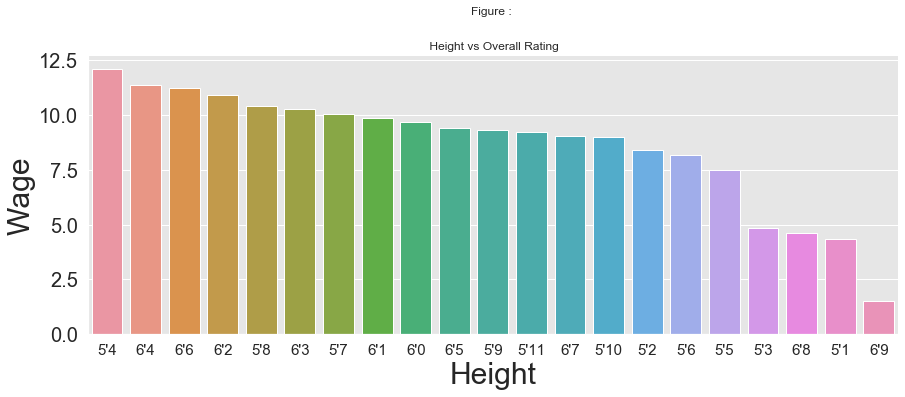

In [45]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Wage",data=avgwageoverall,
            kind="bar",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

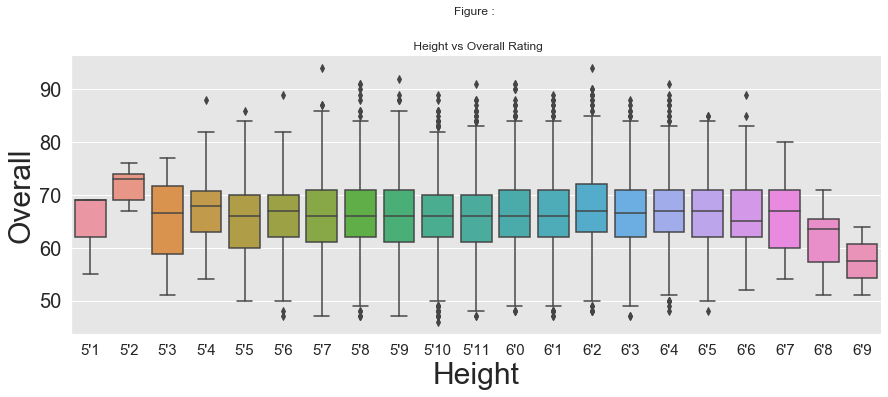

In [46]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Overall",data=dataHeight,
           order = ["5'1","5'2","5'3","5'4","5'5","5'6",
                   "5'7","5'8","5'9","5'10","5'11","6'0","6'1",
                   "6'2","6'3","6'4","6'5","6'6","6'7","6'8", "6'9" ],
            kind="box",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

- Ada 20 ketinggian pemain yang unik.
- Tinggi minimum pemain adalah 5.1'.
- Tinggi maksimum pemain adalah 6.9'.
- Tinggi juga memiliki nilai yang hilang.
- Tinggi badan berpengaruh pada upah tetapi tidak secara teratur.

## **Dose Positioning affect, Overall rating and Wage ?**
Positioning adalah kemampuan pemain untuk mengambil posisi yang baik di lapangan selama pertandingan. Semakin tinggi stat ini, semakin besar kemungkinan pemain untuk membuat ruang yang cukup untuk menerima bola di daerah berbahaya.

Atribut ini berkaitan dengan kemampuan pemain untuk melihat ruang terbuka dan pindah ke posisi bagus yang menawarkan keunggulan menyerang. Namun, itu tidak mempengaruhi di mana pemain akan berada saat mengambil tendangan bebas atau sudut.

In [47]:
dataset.Positioning.value_counts()

58.0    574
65.0    537
62.0    516
64.0    509
60.0    503
       ... 
90.0      4
91.0      3
93.0      2
95.0      1
94.0      1
Name: Positioning, Length: 94, dtype: int64

In [48]:
dataset.Positioning.unique().shape

(95,)

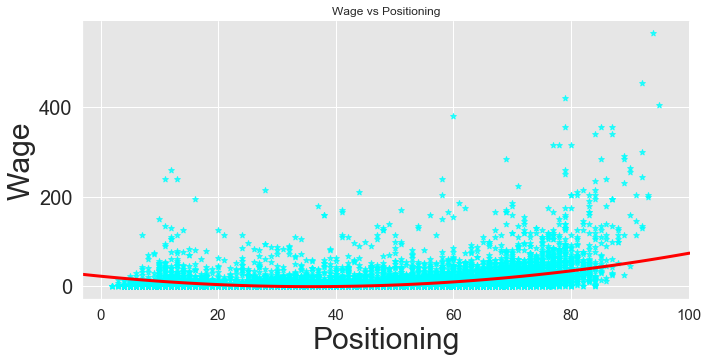

In [49]:
sns.lmplot(x="Positioning", y="Wage",data=dataset,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Wage vs Positioning");

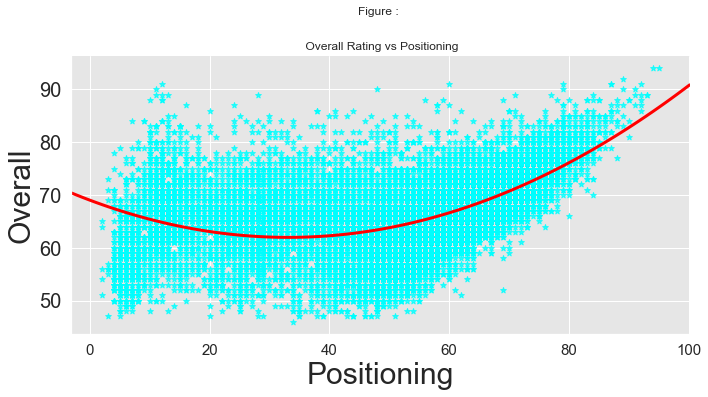

In [50]:
sns.lmplot(x="Positioning", y="Overall",data=dataset,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Overall Rating vs Positioning");

**Nyari posisi kesulurah peringkat dan upah**
1. Ada 95 pemain yang unique
2. posisi pemain tidak banyak berpengaruh ke upah
3. posisi pemain menunjukan tidak berpengaruh ke peringkat pemain
4. untuk posisi pemain 40 , peringkat keseluruhannya mereka menurun lalu meningkat

## **Pemain potensional (Following is defnition)**
1. Ini adalah prediksi bagaimana atribut pemain akan tumbuh. Ini berfungsi sebagai panduan.
2. Potensi pemain bukan peringkatnya.

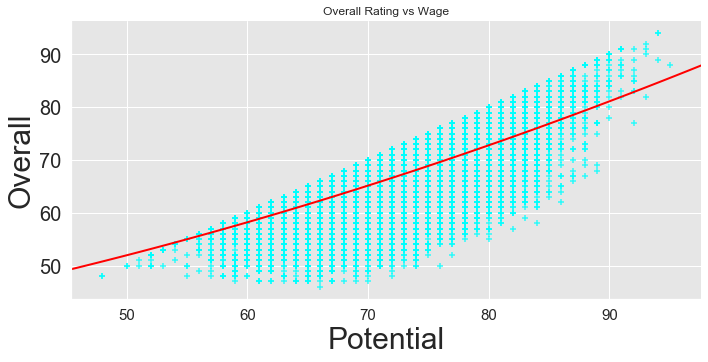

In [51]:
sns.lmplot(x="Potential", y="Overall",data=dataset,markers="+",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":2,"color":"red"},aspect=2);
plt.title("Overall Rating vs Wage");

**Findings Overall Rating and Potential.**
1. Peringkat keseluruhan berbanding lurus dengan Potensi. (Saat Potensi meningkat, peringkat keseluruhan juga meningkat.
2. Seperti potensi yang diperkirakan, dengan cara yang sama pemeringkatan terhadap pemain dilakukan

## **Team which has Potential**
   -  Publik selalu menghargai potensi. Analisis potensi tim menunjukkan masa depan Sepakbola

In [52]:
dataset.Club.value_counts()

Empoli             33
Real Madrid        33
Liverpool          33
RC Celta           33
Atlético Madrid    33
                   ..
Paraná             20
Bahia              20
Sligo Rovers       19
Limerick FC        19
Derry City         18
Name: Club, Length: 651, dtype: int64

In [53]:
avgwageoverall = dataset.groupby("Club", as_index=False)["Potential"].mean()
avgwageoverall.sort_values(by="Potential",inplace=True,ascending=False)
avgwageoverall.head()

,Club,Potential
326,Juventus,85.520000
212,FC Barcelona,85.303030
470,Real Madrid,84.636364
374,Manchester City,83.909091
214,FC Bayern München,83.655172


In [54]:
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Club,Potential
326,Juventus,85.520000
212,FC Barcelona,85.303030
470,Real Madrid,84.636364
374,Manchester City,83.909091
214,FC Bayern München,83.655172
435,Paris Saint-Germain,83.566667
398,Napoli,83.440000
375,Manchester United,82.666667
134,Chelsea,82.636364
382,Milan,82.555556


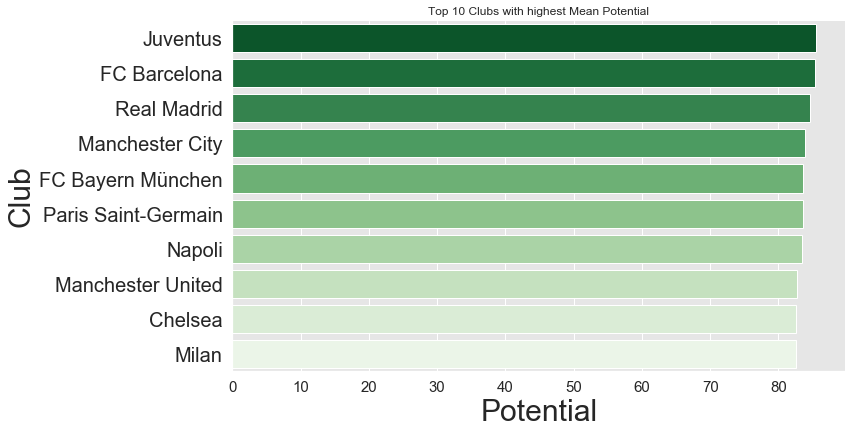

In [55]:
sns.catplot(y="Club",
            x="Potential",data=top10byoverall,
           height=6,kind="bar",aspect=2,palette="Greens_r")
plt.title("Top 10 Clubs with highest Mean Potential");

In [56]:
dataset.Nationality

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [57]:
avgwageoverall = dataset.groupby("Nationality", as_index=False)["Potential"].mean()
avgwageoverall.sort_values(by="Potential",inplace=True,ascending=False)
avgwageoverall.head()

,Nationality,Potential
42,Dominican Republic,80.500000
156,United Arab Emirates,78.000000
28,Chad,78.000000
27,Central African Rep.,76.000000
128,Russia,75.341772


In [58]:
top10keseluruhan = avgwageoverall.iloc[0:10,:]
top10keseluruhan

,Nationality,Potential
42,Dominican Republic,80.500000
156,United Arab Emirates,78.000000
28,Chad,78.000000
27,Central African Rep.,76.000000
128,Russia,75.341772
123,Portugal,75.298137
47,Equatorial Guinea,75.200000
155,Ukraine,75.095890
139,Spain,74.616604
35,Croatia,74.492063


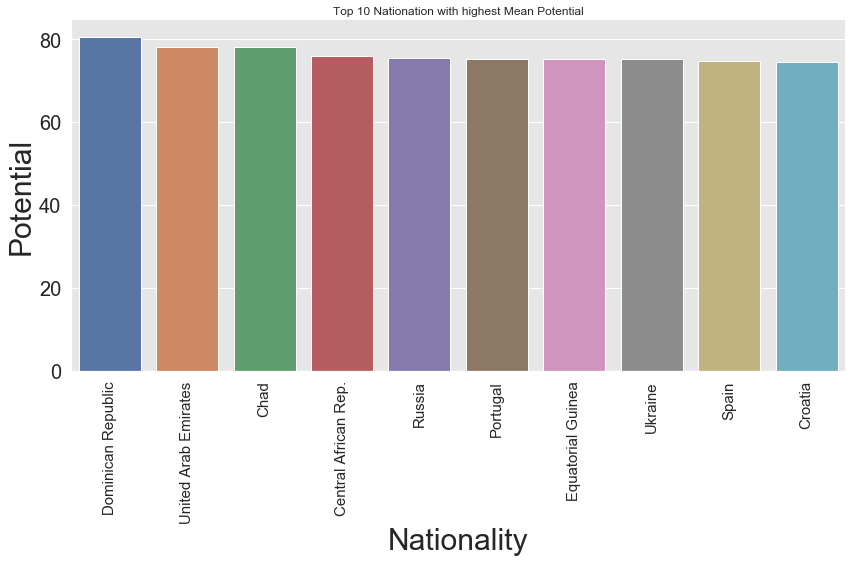

In [59]:
sns.catplot(x="Nationality",
            y="Potential",data=top10keseluruhan,
           height=6,kind="bar",aspect=2)
plt.xticks(rotation=90)
plt.title("Top 10 Nationation with highest Mean Potential");

## **KESIMPULAN**
- preferred foot tidak banyak berpengaruh pada upah atau peringkat keseluruhan.
- Nationality memengaruhi upah dan peringkat keseluruhan Pemain.
- Klub memiliki efek yang sangat berbeda pada upah.
- Klub tidak memiliki dampak yang sangat tajam pada peringkat keseluruhan.
- usia pemain berapa pada usia 20 sampai kurang dari 30 tahun
- Tipe Tubuh memengaruhi upah pemain karena tipe tubuh L. messi memiliki upah tertinggi. Upah pemain yang memiliki tipe tubuh C. Ronaldo mengikuti pemain tipe tubuh messi dalam konteks upah
- Tipe Tubuh memengaruhi peringkat keseluruhan pemain karena tipe tubuh Messi dan C. Ronaldo memiliki Peringkat Keseluruhan tertinggi. Peringkat keseluruhan pemain yang memiliki tipe Neymar mengikuti pemain tipe tubuh messi dalam konteks peringkat keseluruhan.
- Penalti Seorang Pemain tidak banyak mempengaruhi upah mereka.
- Sebagai Penalti meningkatkan peringkat keseluruhan meningkat.
- Berat Pemain tidak banyak mempengaruhi upah mereka.
- Berat Pemain tidak memengaruhi peringkat keseluruhan pemain.
- Posisi Pemain tidak memengaruhi peringkat keseluruhan pemain.
- Terhadap posisi pemain 40 peringkat keseluruhan mereka berkurang, kemudian meningkat.
- Seperti potensi yang diperkirakan, dengan cara yang sama pemeringkatan terhadap pemain dilakukan.